In [1]:
import pandas as pd
import numpy as np
import sqlite3
import pandasql
from pandasql import sqldf
import matplotlib.pyplot as plt
import sklearn

pysqldf = lambda q: sqldf(q, globals())

# q = """
# ;"""
# data_cleaned = pysqldf(q)
# data_cleaned

In [2]:
data1 = pd.read_csv("./data/202004-divvy-tripdata.csv")
data2 = pd.read_csv("./data/202005-divvy-tripdata.csv")
data3 = pd.read_csv("./data/202006-divvy-tripdata.csv")
data4 = pd.read_csv("./data/202007-divvy-tripdata.csv")
data5 = pd.read_csv("./data/202008-divvy-tripdata.csv")
data6 = pd.read_csv("./data/202009-divvy-tripdata.csv")
data7 = pd.read_csv("./data/202010-divvy-tripdata.csv")
data8 = pd.read_csv("./data/202011-divvy-tripdata.csv")
data9 = pd.read_csv("./data/202012-divvy-tripdata.csv")


In [3]:

data10 = pd.read_csv("./data/202101-divvy-tripdata.csv")
data11 = pd.read_csv("./data/202102-divvy-tripdata.csv")
data12 = pd.read_csv("./data/202103-divvy-tripdata.csv")
data13 = pd.read_csv("./data/202104-divvy-tripdata.csv")
data14 = pd.read_csv("./data/202105-divvy-tripdata.csv")
data15 = pd.read_csv("./data/202106-divvy-tripdata.csv")
data16 = pd.read_csv("./data/202107-divvy-tripdata.csv")
data17 = pd.read_csv("./data/202108-divvy-tripdata.csv")
data22 = pd.read_csv("./data/Divvy_Trips_2020_Q1.csv")


In [26]:

# data19 = pd.read_csv("./data/Divvy_Trips_2019_Q2")

# data18 = pd.read_csv("./data/Divvy_Trips_2019_Q1")

# data20 = pd.read_csv("./data/Divvy_Trips_2019_Q3.csv")
# data21 = pd.read_csv("./data/Divvy_Trips_2019_Q4.csv")


In [5]:
data_cleaned = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data22])
data_cleaned.sort_values(by='started_at', inplace=True)

# Casual vs Member Riders

- Differences between the 2 kinds of users
    - Who bikes more often?
    - Are there differences in the times they bike at? (time of day; day of week; month of year)
    - Are there differences in the rideable types?
    - Are there differences in duration?
    - Differences in Location?

## Basic EDA
Finding the distribution of each type and how often they use Cyclist.

In [68]:
# Number of customers in each group
data_desc = data_cleaned['member_casual'].describe()
# print(d['freq']/d['count'])

# Trip duration of each group
data_cleaned['duration'] = pd.to_datetime(data_cleaned['ended_at']) - pd.to_datetime(data_cleaned['started_at'])
data_cleaned['duration'] = data_cleaned['duration'].dt.seconds/3600
group_duration = data_cleaned.groupby('member_casual')['duration'].agg('sum')

# Trip number of each group
data_cleaned['trips'] = 1
trip_amt = data_cleaned.groupby('member_casual')['duration'].agg('sum')



In [70]:
groups = ['member', 'casual']

fig = plt.figure(figsize=(18,10), dpi=1600)

ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie([data_desc['freq'], data_desc['count']], labels=groups, autopct='%1.2f%%')
plt.title('Number of members vs casual customers')
#next one
ax1 = plt.subplot2grid((1, 3), (0, 1))
plt.pie([float(group_duration['member']), float(group_duration['casual'])], labels=groups, autopct='%1.2f%%')
plt.title('Duration of trips for members vs casual')

ax1 = plt.subplot2grid((1, 3), (0, 2))
plt.pie([float(trip_amt['member']), float(trip_amt['casual'])], labels=groups, autopct='%1.2f%%')
plt.title('Number of trips for members vs casual')
# plt.show()

Text(0.5, 1.0, 'Number of trips for members vs casual')

## Daily Distribution
How often does each customer type use Cyclist and at what times.

In [18]:
from sklearn import preprocessing

# Scatter Plot:
# Color to show member vs casual 
# Opacity to show number of trips
# x-axis plots the time of day
# y-axis plots the total ride Time

def get_class_data(data1_times, name):
    member_data = data1_times[data1_times['member_casual'] == name]
    member_data['hour'] = pd.to_datetime(member_data['started_at']).dt.hour
    member_data['trips'] = 1
    member_data['duration'] = member_data['duration'].dt.seconds/3600
    member_scatter = member_data.groupby(['hour'])['duration'].agg('sum')
    alphas = member_data.groupby(['hour'])['trips'].agg('sum')
    member_x = list(member_scatter.index)
    member_y = list(member_scatter.values)
    return member_x, member_y, alphas

def create_versus_scatter(data, month):
    data_times = data.drop(data.columns[[4,5,6,7,8,9,10,11]], axis=1)
    data_times['duration'] = pd.to_datetime(data_times['ended_at']) - pd.to_datetime(data_times['started_at'])

    member_x, member_y, alphas_m = get_class_data(data_times, 'member')
    casual_x, casual_y, alphas_c = get_class_data(data_times, 'casual')

    combined = list(alphas_c) + list(alphas_m)
    alphas = preprocessing.minmax_scale(combined, feature_range=(5, 100), axis=0, copy=True)
    alphas = [round(num, 4) for num in alphas]
    alpha_m = alphas[:24]
    alpha_c = alphas[24:]

    plt.scatter(member_x, member_y, s=alpha_m, color='orange', label='member')
    plt.scatter(casual_x, casual_y, s=alpha_c, color='teal', label='casual')
    plt.legend(loc='upper left')
    plt.ylabel('total hours in the bike')
    plt.xlabel('hour of day')
    plt.title(f'Member vs Casual bike rides for {month}')
    plt.rcParams["figure.figsize"] = (12,3)
    plt.xticks(member_x, ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am','11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'], rotation=45)
    plt.show()


<ipython-input-18-bb077b06298b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_data['hour'] = pd.to_datetime(member_data['started_at']).dt.hour
<ipython-input-18-bb077b06298b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_data['trips'] = 1
<ipython-input-18-bb077b06298b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

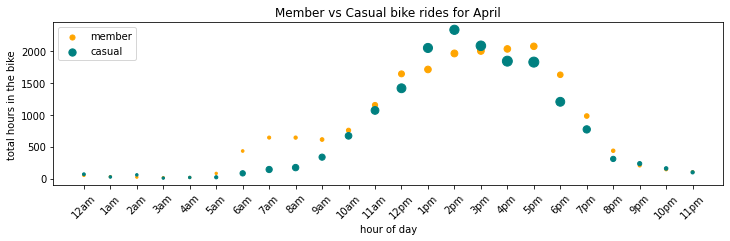

<ipython-input-18-bb077b06298b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_data['hour'] = pd.to_datetime(member_data['started_at']).dt.hour
<ipython-input-18-bb077b06298b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_data['trips'] = 1
<ipython-input-18-bb077b06298b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

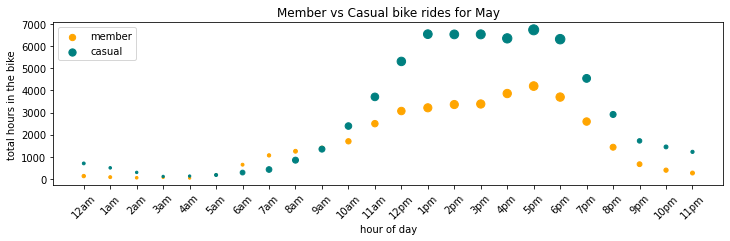

<ipython-input-18-bb077b06298b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_data['hour'] = pd.to_datetime(member_data['started_at']).dt.hour
<ipython-input-18-bb077b06298b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_data['trips'] = 1
<ipython-input-18-bb077b06298b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

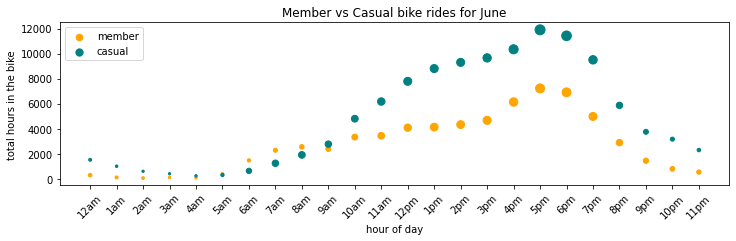

In [19]:

# import warnings
# warnings.filterwarnings("ignore")
create_versus_scatter(data1, 'April')
create_versus_scatter(data2, 'May')
create_versus_scatter(data3, 'June')

## Comparing month-to-month data for riders

In [15]:
# split the days into 4 sections and apply on each month.
morning = [4, 5, 6, 7, 8, 9]
afternoon = [10, 11, 12, 13, 14, 15]
evening = [16, 17, 18, 19, 20, 21]
night = [22, 23, 0, 1, 2, 3]

In [16]:
def create_stacked_bar(data, month):
    data_times = data.drop(data.columns[[4,5,6,7,8,9,10,11]], axis=1)
    data_times['duration'] = pd.to_datetime(data_times['ended_at']) - pd.to_datetime(data_times['started_at'])
    data_times['duration'] = data_times['duration'].dt.seconds/3600
    data_times['hour'] = pd.to_datetime(data_times['started_at']).dt.hour
    data_times['hour'].loc[(data_times['hour'] >= 22) | (data_times['hour'] <= 3)] = 3
    data_times['hour'].loc[(data_times['hour'] >= 4) & (data_times['hour'] <= 9)] = 0
    data_times['hour'].loc[(data_times['hour'] >= 10) & (data_times['hour'] <= 15)] = 1
    data_times['hour'].loc[(data_times['hour'] >= 16) & (data_times['hour'] <= 21)] = 2
    y = pd.DataFrame(data_times.groupby('hour')['duration'].agg(sum))
    y.index = ['morning', 'afternoon', 'evening', 'night']
    y = y.T
    y.index = [month]
    return y

y = create_stacked_bar(data1, "April")
y = y.append(create_stacked_bar(data2, "May"))
y = y.append(create_stacked_bar(data3, 'June'))
y = y.append(create_stacked_bar(data4, 'July'))
y = y.append(create_stacked_bar(data5, 'August'))
y = y.append(create_stacked_bar(data6, 'September'))
y = y.append(create_stacked_bar(data7, 'October'))
y = y.append(create_stacked_bar(data8, 'November'))
y = y.append(create_stacked_bar(data9, 'December'))
y = y.append(create_stacked_bar(data10, 'January 2021'))
y = y.append(create_stacked_bar(data11, 'February 2021'))
y = y.append(create_stacked_bar(data12, 'March 2021'))
y = y.append(create_stacked_bar(data13, 'April 2021'))
y = y.append(create_stacked_bar(data14, 'May 2021'))
y = y.append(create_stacked_bar(data15, 'June 2021'))
y = y.append(create_stacked_bar(data16, 'July 2021'))
y = y.append(create_stacked_bar(data16, 'August 2021'))


# member_x, member_y, alphas_m = get_month_data(data_times, 'member')
# casual_x, casual_y, alphas_c = get_month_data(data_times, 'casual')

/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

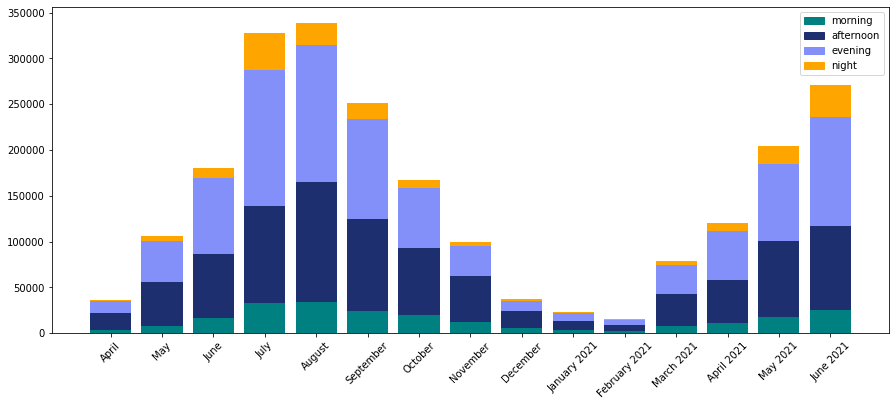

In [17]:
import matplotlib.patches as mpatches

fields = ['morning','afternoon', 'evening', 'night']
colors = [ 'teal', '#1D2F6F', '#8390FA', 'orange']

fig, ax = plt.subplots(1, figsize=(15, 6))
left = len(y) * [0]
for idx, name in enumerate(fields):
    plt.bar(y.index, y[name], bottom = left, color=colors[idx])
    left = left + y[name]

morn = mpatches.Patch(color='teal', label='morning')
aft = mpatches.Patch(color='#1D2F6F', label='afternoon')
eve = mpatches.Patch(color='#8390FA', label='evening')
night = mpatches.Patch(color='orange', label='night')

plt.legend(handles=[morn, aft,eve, night ])
plt.xticks(rotation=45)

In [ ]:
data11

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49617,7ED482EE6C9F5DB2,classic_bike,2021-02-20 15:25:32,2021-02-20 15:59:45,Western Ave & Leland Ave,TA1307000140,NaN,NaN,41.966495,-87.688419,41.950000,-87.660000,member
49618,203DF22F090C1777,classic_bike,2021-02-09 08:54:38,2021-02-09 09:08:19,Franklin St & Chicago Ave,13017,NaN,NaN,41.896747,-87.635668,NaN,NaN,member
49619,940161523673F056,docked_bike,2021-02-27 14:46:06,2021-02-27 15:00:49,Franklin St & Chicago Ave,13017,Michigan Ave & Oak St,13042,41.896747,-87.635668,41.900960,-87.623777,casual
49620,C5538FFA492A7B00,classic_bike,2021-02-09 11:44:17,2021-02-09 11:46:13,Franklin St & Chicago Ave,13017,Wells St & Walton St,TA1306000011,41.896747,-87.635668,41.899930,-87.634430,member
